In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load cleaned dataset
df = pd.read_csv("C:/Users/Swati/Gitproject/CPSC6185-Final-Project/data/processed/merged_cleaned.csv")

In [3]:
features = [
    'ENERGY_CONSUMPTION_PER_SQFT',
    'Pct_INCOME_MORE_THAN_150K',
    'Pct_MAIN_HEAT_AGE_OLDER_THAN_20',
    'CLIMATE_Cold', 'CLIMATE_Hot-Dry', 'CLIMATE_Hot-Humid',
    'CLIMATE_Marine', 'CLIMATE_Mixed-Dry', 'CLIMATE_Mixed-Humid', 'CLIMATE_Very-Cold',
    'URBAN_RURAL_Rural Area', 'URBAN_RURAL_Urban Area', 'URBAN_RURAL_Urban Cluster',
    'REGION_MIDWEST', 'REGION_NORTHEAST', 'REGION_SOUTH', 'REGION_WEST'
]
df_model = df[features].copy()

In [4]:
# Create Efficiency Class based on ENERGY_CONSUMPTION_PER_SQFT
def classify_efficiency(x):
    if x < 40:
        return "High"
    elif x <= 50:
        return "Moderate"
    else:
        return "Low"

df_model['Efficiency_Class'] = df['ENERGY_CONSUMPTION_PER_SQFT'].apply(classify_efficiency)
X = df_model.drop(columns=['Efficiency_Class'])
y = df_model['Efficiency_Class']

In [5]:
# Train/Test split and Decision Tree Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         4
    Moderate       1.00      1.00      1.00         7

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



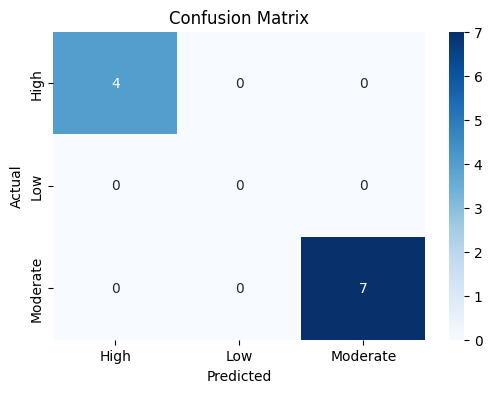

In [6]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

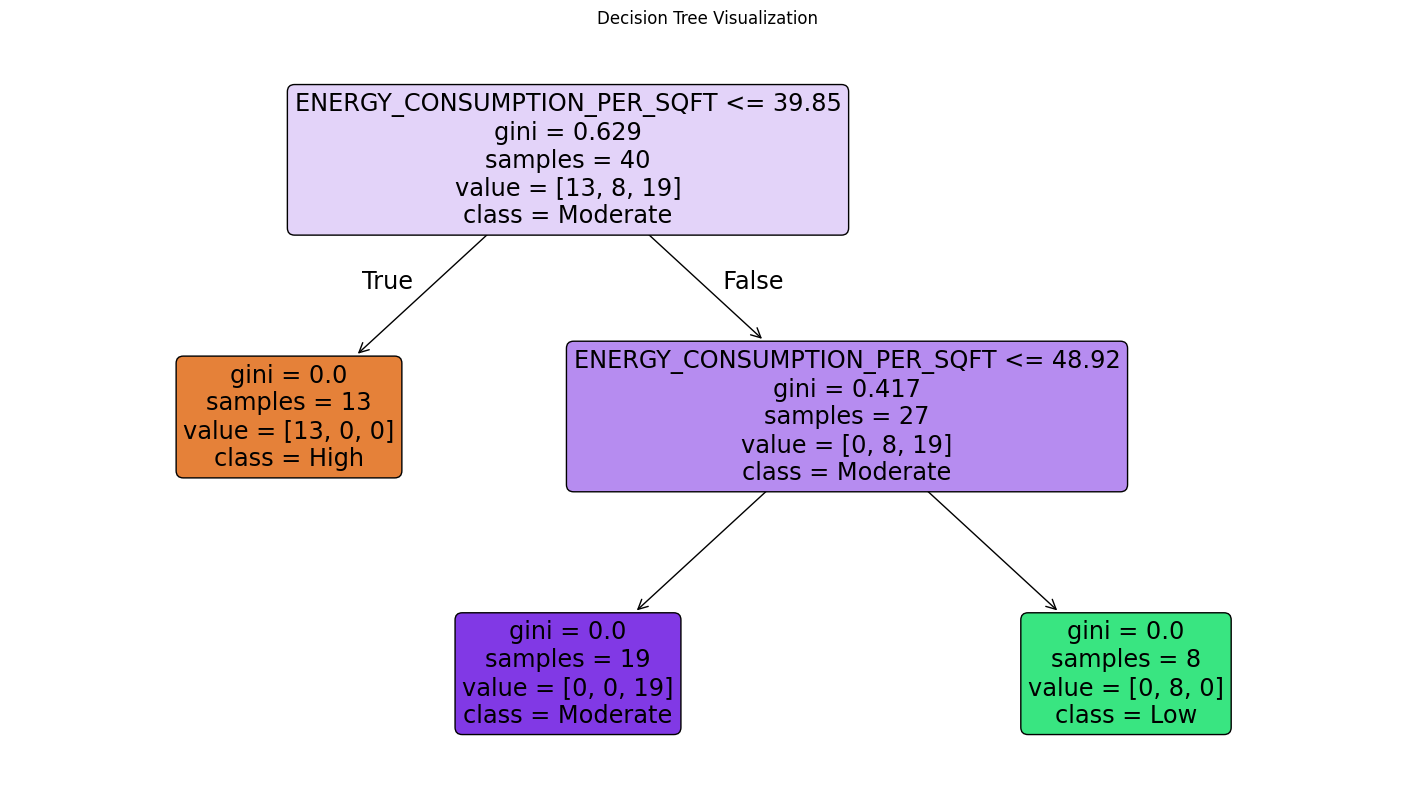

In [7]:
# Decision Tree Plot
plt.figure(figsize=(18, 10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [8]:
# 5-Fold Cross-Validation
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.90909091 0.9        1.         0.9        1.        ]
Average CV Accuracy: 0.9418181818181818
